# Linear Regression Walkthrough

In this workbook, we will go over linear regression using a fish dataset. Specifically we will look at the relationship between length and weight and will fit a linear model that could be used to predict new values of weight.

I like to do **2 things** when I run linear regressions:
- Qualitative component - where  I look at a plot
- Quantitative component - where I look at the statistical output

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/wynnephilpott/Documents/Missing Pauldron/Notebooks/Misc Shit/Files/Fish.csv')

In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Lenth2 is the horizontal length of the fish. This is what we will use as our X variable, also called our predictor. Weight will be our y variable. Lets visualize them to examine the relationship b/w the two.

<AxesSubplot:xlabel='Length2', ylabel='Weight'>

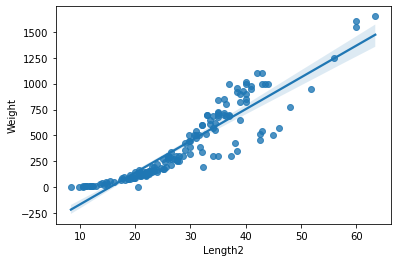

In [11]:
sns.regplot(x='Length2',y='Weight',data=df)

### Observations

From the plot, there appears to be a **positive**, somewhat **linear** relationship b/w length and weight. There is some slight curvature (almost looks like a cuddlefish speaking of ocean-dwellers xD) which could be addressed with a quadratic model however, let's not complicate things for this first iteration. Lets fit a linear regression model to the data and print out the summary.

In [12]:
import statsmodels.api as sm


X = sm.add_constant(df['Length2'])
y = df['Weight']


## Fit the model

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     848.5
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.40e-65
Time:                        09:54:33   Log-Likelihood:                -1012.5
No. Observations:                 159   AIC:                             2029.
Df Residuals:                     157   BIC:                             2035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -473.6490     31.980    -14.811      0.0

/Users/wynnephilpott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## What am I looking at?

Model summaries throw a TON of numbers at you but for me, there are just 3 things I care about:
- **R-squared** (0.844)
- **The variable coefficient** (30.686)
- **P>|t| of the coefficient** (0.000)
 
 
**R-squared** is defined as the percent of varitaion in y explained by X. What does this actually mean? It means that R-squared to some extent tells how well our model fits the data. Essentially 84% of fish weight can be predicted from just fish length. There is no specific criteria for what constitutes a good R-squared or a bad one. For me, anything at .4 and above are noteworthy and we really never see high R-squareds in the wild, especially when modelling human behavior. 

**The variable coefficient** defines the mapping, or the relationship b/w the predictor and the predicted. In this case we have: 

```Weight = -473.65 + 30.69*Length```
Notice the **sign** of the variable coefficient, it is **positive** (+). Right away that tells us that as length goes up, weight goes up! If the sign was negative, then the reverese would be the case.

**P>|t|** is the p-value of the coefficient. Mathematically, the p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). In English, the p-value equalling 0.000 simply tells us that there IS an effect, the coefficient is valid! We can use it and doing so makes sense.

Using the 3 together: We have a positive relationship b/w length and weight, this relationship is defined by the coefficient (30.686) and is statistically significant (p-value = 0.000) and finally, this relationship is strong, with length explaining 84.4% of the variation in weight.

## Weight = -473.65 + 30.69*Length

(for every unit increase in length, weight goes up by 30.69 grams)